Load a random vector with the divide-and-conquer state preparation.

In [1]:
import numpy as np
from encoding import Encoding
from qiskit import Aer, ClassicalRegister, execute, visualization

In [2]:
# input_vector = range(1, 17)
input_vector = [np.sqrt(1/8),np.sqrt(1/8),np.sqrt(1/8),np.sqrt(1/8),np.sqrt(1/8),np.sqrt(1/8),np.sqrt(1/8),np.sqrt(1/8)]

input_vector = input_vector / np.linalg.norm(input_vector)
expected_probabilities = input_vector ** 2
print((input_vector))

[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]


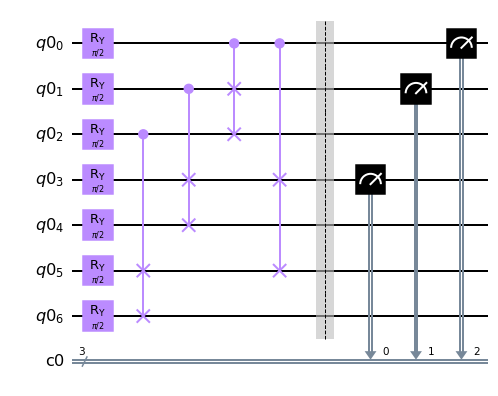

In [3]:
encode = None
encode = Encoding(input_vector, 'dc_amplitude_encoding')
output = ClassicalRegister(len(encode.output_qubits))
encode.qcircuit.add_register(output)
encode.qcircuit.barrier()


for k, value in enumerate(reversed(encode.output_qubits)):
    encode.qcircuit.measure(encode.quantum_data[value], output[k])
    
encode.qcircuit.draw('mpl')
visualization.circuit_drawer(encode.qcircuit, filename="circuit", output='mpl', style={'backgroundcolor': '#FFFFFF'})

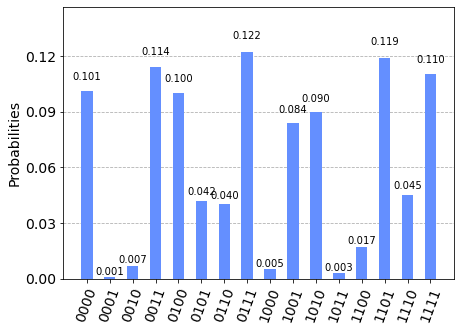

In [4]:
circuit = encode.qcircuit
backend_sim = Aer.get_backend('qasm_simulator')
shots = 1000
job = execute(circuit, backend_sim, shots = shots)
results = job.result()
counts = results.get_counts()
visualization.plot_histogram(counts)

In [5]:
expected_probabilities

array([0.1210811 , 0.00352124, 0.01119679, 0.10411438, 0.10219451,
       0.03763963, 0.05074582, 0.10936027, 0.00445617, 0.07094581,
       0.10861895, 0.00142763, 0.0203487 , 0.10439658, 0.0489563 ,
       0.10099613])